# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

***
### Data sources:

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.


### Project Goals

In this project, the goal is to utilize the skills learned through Codecademy and apply machine learning techniques to a data set. The primary research question that will be answered is if there are important variables that can predict a user’s zodiac signs so we can guess the missing zodiacs when we make matches.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. In that way, classification algorithms from the supervised learning will be implemented, since the goal of the project is to identify the best characteristics and preferences to classify  the people and try to predict their zodiac sign.

### Evaluation

The project will conclude with the evaluation of the machine learning models selected with a validation dataset. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall and F1.
***

### 1. Import Python Modules

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### 2. Loading the Data
To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

Here `profiles.csv` is loaded into a `DataFrame` called `df`. The dataframe is then briefly examined to check the contents and composition.

In [2]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.shape

(59946, 31)

In [4]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

##### Data Characteristics

In the first view, it is possible to see that `df` has 59.946 rows and 31 columns with some `Nan` values. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer in the columns `essay0` to `essay9`. I will delete them because I believe they are not good predictors for the different clusters. 

In [6]:
df1 = df.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7','essay8', 'essay9'], axis=1)
df1.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')

### 3. Exploratory Data Analysis.
First to be explored is the number of unique values in each feature.

In [7]:
# Number of uniques categories by feature.
columns = df1.columns

for i in range(len(columns)):
    print('Columns {c}'.format(c = str(columns[i])))
    print("Number of categories:",df1[str(columns[i])].nunique())
    print('-' * 100)

Columns age
Number of categories: 54
----------------------------------------------------------------------------------------------------
Columns body_type
Number of categories: 12
----------------------------------------------------------------------------------------------------
Columns diet
Number of categories: 18
----------------------------------------------------------------------------------------------------
Columns drinks
Number of categories: 6
----------------------------------------------------------------------------------------------------
Columns drugs
Number of categories: 3
----------------------------------------------------------------------------------------------------
Columns education
Number of categories: 32
----------------------------------------------------------------------------------------------------
Columns ethnicity
Number of categories: 217
----------------------------------------------------------------------------------------------------
Columns hei

Looking at the quantity of categories in each feature, I will proceed to drop out the next columns because I considered that they have a big quantity of categories and they are not necessary for model. 

Columns to be drop out:
- age
- body_type
- ethnicity
- height
- last_online
- location
- speaks

In [8]:
df2 = df1.drop(['age','body_type','ethnicity', 'height', 'last_online', 'location', 'speaks'], axis=1)
df2.columns

Index(['diet', 'drinks', 'drugs', 'education', 'income', 'job', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'status'],
      dtype='object')

In [9]:
# Uniques categories by feature.
columns = df2.columns

for i in range(len(columns)):
    print('Columns {c}'.format(c = str(columns[i])))
    print("Number of categories:",df1[str(columns[i])].unique())
    print('-' * 100)

Columns diet
Number of categories: ['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
----------------------------------------------------------------------------------------------------
Columns drinks
Number of categories: ['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
----------------------------------------------------------------------------------------------------
Columns drugs
Number of categories: ['never' 'sometimes' nan 'often']
----------------------------------------------------------------------------------------------------
Columns education
Number of categories: ['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'g

Clean Categories: 

I will proceed to clean the different categories for theses columns:
- **diet:** grouping the 18 categories in 6:  
    - *anything* - Will include: 'strictly anything', 'anything', 'mostly anything'
    - *vegetarian* - Will include: 'vegetarian', 'mostly vegetarian', 'strictly vegetarian'
    - *vegan* - Will include: 'strictly vegan', 'mostly vegan', 'vegan'
    - *halal* - Will include: 'mostly halal', 'strictly halal', 'halal'
    - *kosher* - Will include: 'mostly kosher', 'strictly kosher', 'kosher'
    - *other* -  Will include: 'mostly other', 'strictly other, 'other'
    

- **education:** grouping the 32 categories in 13
    - *high school* - Will include: 'working on high school', 'high school'
    - *college/university* - Will include: 'working on two-year college', 'working on college/university', 'college/university', 'graduated from law school', 'two-year college', 'working on med school', 'working on law school', 'law school', 'med school'
    - *masters program - Will include* - 'working on masters program', 'masters program'
    - *ph.d program - Will include* -  'working on ph.d program', 'ph.d program'
    - *graduated from high school* - Will include: 'graduated from high school'
    - *graduated from college/university* - Will include:  'graduated from college/university', 'graduated from two-year college', 'graduated from med school'
    - *graduated from masters program* - Will include:  'graduated from masters program'
    - *graduated from ph.d program* - Will include:  'graduated from ph.d program'
    - *dropped out of high school* - Will include:  'dropped out of high school'
    - *dropped out of college/university* - Will include:  'dropped out of college/university', 'dropped out of two-year college', 'dropped out of med school', 'dropped out of law school'
    - *dropped out of masters program* -Will include:  'dropped out of masters program'
    - *dropped out of ph.d program* -Will include:  'dropped out of ph.d program'
    - *other categories*- Will include - Will include: 'working on space camp', 'graduated from space camp', 'dropped out of space camp', 'space camp'

- **religion:** Leaving only the first Religion that the person choosen. 

- **sign:** Leaving only 12 categories.  

In [10]:
# DIET VARIABLE
# I will create a new column with null values.
df2['new_diet'] = 'Nan'

# I will create a different diet categories.
anything = ['strictly anything', 'anything', 'mostly anything']
vegetarian = ['vegetarian', 'mostly vegetarian', 'strictly vegetarian']
vegan = ['strictly vegan', 'mostly vegan', 'vegan']
halal = ['mostly halal', 'strictly halal', 'halal']
kosher = ['mostly kosher', 'strictly kosher', 'kosher']
other = ['mostly other', 'strictly other', 'other']

# I will refill the new column with the apropiate diet category.
df2['new_diet'] = df2.diet.replace(anything, "Anything")
df2['new_diet'] = df2.new_diet.replace(vegetarian, "Vegetarian")
df2['new_diet'] = df2.new_diet.replace(vegan, "Vegan")
df2['new_diet'] = df2.new_diet.replace(halal, "Halal")
df2['new_diet'] = df2.new_diet.replace(kosher, "Kosher")
df2['new_diet'] = df2.new_diet.replace(other, "Other")

df2[['diet', 'new_diet']].head(10)

,diet,new_diet
0,strictly anything,Anything
1,mostly other,Other
2,anything,Anything
3,vegetarian,Vegetarian
4,NaN,NaN
5,mostly anything,Anything
6,strictly anything,Anything
7,mostly anything,Anything
8,strictly anything,Anything
9,mostly anything,Anything


In [11]:
# Checking the number of categories in new_diet
print("Number of categories:",str(df2.new_diet.nunique()))

Number of categories: 6


In [12]:
# EDUCATION VARIABLE.
# I will create a new column with null values.
df2['new_education'] = 'Nan'

# I will create a different diet categories.
high_school = ['working on high school', 'high school']
college_university = ['working on two-year college', 'working on college/university', 
                      'college/university', 'graduated from law school', 'two-year college', 
                      'working on med school', 'working on law school', 'law school', 'med school']
masters = ['working on masters program', 'masters program']
phd = ['working on ph.d program', 'ph.d program']
graduated_college_university = ['graduated from college/university', 'graduated from two-year college', 
                                'graduated from med school']
dropped_college_university = ['dropped out of college/university', 'dropped out of two-year college', 
                              'dropped out of med school', 'dropped out of law school']
other_categories = ['working on space camp', 'graduated from space camp', 'dropped out of space camp', 'space camp']


# I will refill the new column with the apropiate diet category.
df2['new_education'] = df2.education.replace(high_school, "high school")
df2['new_education'] = df2.new_education.replace(college_university, "college/university")
df2['new_education'] = df2.new_education.replace(masters, "masters program")
df2['new_education'] = df2.new_education.replace(phd, "ph.d program")
df2['new_education'] = df2.new_education.replace(graduated_college_university, "graduated from college/university")
df2['new_education'] = df2.new_education.replace(dropped_college_university, "dropped out of college/university")
df2['new_education'] = df2.new_education.replace(other_categories, "other categories")


df2[['education', 'new_education']].head(10)

,education,new_education
0,working on college/university,college/university
1,working on space camp,other categories
2,graduated from masters program,graduated from masters program
3,working on college/university,college/university
4,graduated from college/university,graduated from college/university
5,graduated from college/university,graduated from college/university
6,graduated from college/university,graduated from college/university
7,graduated from college/university,graduated from college/university
8,graduated from college/university,graduated from college/university
9,working on two-year college,college/university


In [13]:
# Checking the number of categories in new_education
print("Number of categories:",str(df2.new_education.nunique()))

Number of categories: 13


In [14]:
# Cleaning Religion column.
df2['new_religion'] = df2.religion.str.split().str.get(0)
print("Number of categories:",df2.new_religion.nunique())
print("Categories:", df2.new_religion.unique())

Number of categories: 9
Categories: ['agnosticism' nan 'atheism' 'christianity' 'other' 'catholicism'
 'buddhism' 'judaism' 'hinduism' 'islam']


In [15]:
# Clening Signs column.
df2['new_signs'] = df2.sign.str.split().str.get(0)
print("Number of categories:",df2.new_signs.nunique())
print("Categories:", df2.new_signs.unique())

Number of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


In [16]:
# Delete the old columns, rename the new ones.
df2 = df2.drop(['diet', 'education','religion', 'sign'], axis = 1)

In [17]:
df2.rename(columns = {'new_diet': 'diet', 'new_education' : 'education', 
                      'new_religion':'religion', 'new_signs' :  'signs'}, inplace = True)
df2.columns

Index(['drinks', 'drugs', 'income', 'job', 'offspring', 'orientation', 'pets',
       'sex', 'smokes', 'status', 'diet', 'education', 'religion', 'signs'],
      dtype='object')

#### Visualizing the data: 
I will proceed to visualizing the different features using the seaborn library:

In the first plot, it is possible to see that there are more males than females in the data. The second plot is telling us that there are more straight people than bisexual or gay. But, in the same times, it is possible to notice that there are more bisexual females and more male gays. In the last plot we can check that there are more people single than the other states. 

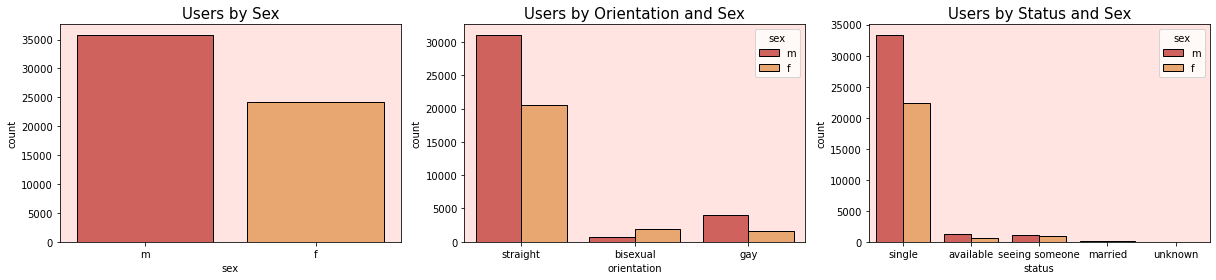

In [18]:
sns.set_palette ('Spectral')

fig = plt.figure(figsize = (17,4))

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.countplot(data=df2, x="sex", edgecolor = 'black')
ax1.set_title('Users by Sex', fontsize = 15)
ax1.set_facecolor('mistyrose')

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.countplot(data=df2, x="orientation", hue = 'sex', edgecolor = 'black')
ax2.set_title('Users by Orientation and Sex', fontsize = 15)
ax2.set_facecolor('mistyrose')

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.countplot(data=df2, x="status", hue = 'sex', edgecolor = 'black')
ax3.set_title('Users by Status and Sex', fontsize = 15)
ax3.set_facecolor('mistyrose')

plt.tight_layout()
plt.show()

Corroborating the following four graphs: 
- In the graph with the dietary information for users, it is possible to see that most user eat "Anything", followed by "Vegetarian".
- In the second plot it is possible to check that most of the users are "Social drinkers".  
- In the third plot, we can see that most users "never" use drugs
- And in the last graph, similarly for drugs the majority of users chose "no" for smoking.
- In addition, we detected that, in all categories, the proportion of males are higher than the females.

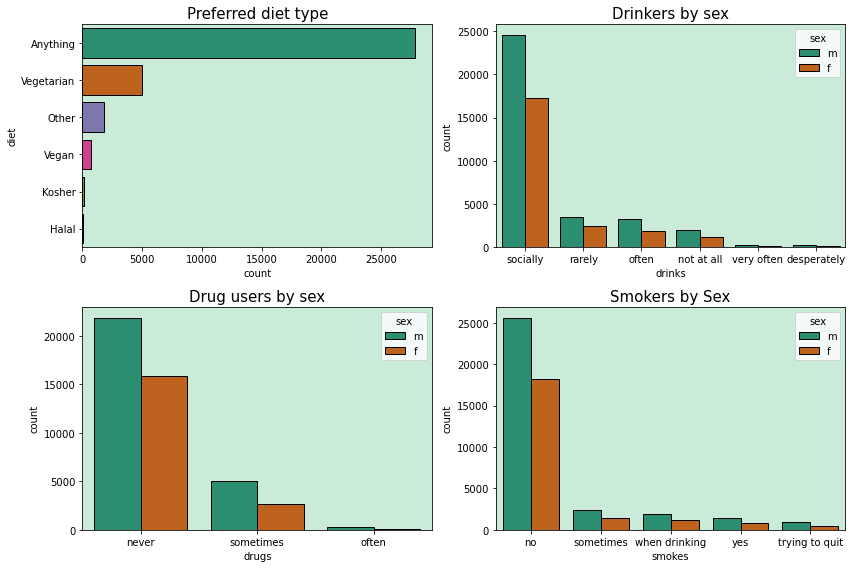

In [19]:
sns.set_palette ('Dark2')

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.countplot(data=df2, y="diet", edgecolor = 'black',
                    order=df2['diet'].value_counts().sort_values(ascending = False).index)
ax1.set_title('Preferred diet type', fontsize = 15)
ax1.set_facecolor('#caebd8')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.countplot(data=df2, x="drinks", hue = 'sex', edgecolor = 'black',
                    order=df2['drinks'].value_counts().sort_values(ascending = False).index)
ax2.set_title('Drinkers by sex', fontsize = 15)
ax2.set_facecolor('#caebd8')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.countplot(data=df2, x="drugs", hue = 'sex', edgecolor = 'black',
                   order=df2['drugs'].value_counts().sort_values(ascending = False).index)
ax3.set_title('Drug users by sex', fontsize = 15)
ax3.set_facecolor('#caebd8')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.countplot(data=df2, x="smokes", hue = 'sex', edgecolor = 'black',
                   order=df2['smokes'].value_counts().sort_values(ascending = False).index)
ax4.set_title('Smokers by Sex', fontsize = 15)
ax4.set_facecolor('#caebd8')

plt.tight_layout()
plt.show()

Below you can see the majority of users are graduate from college/university followed by people who are still in college/university and people who is graduated from master programs. If we see the users' jobs graph, it is possible to see that most users don't fit into the categories provided, but there are a fair share of students, tech, computer, artists and business folks.

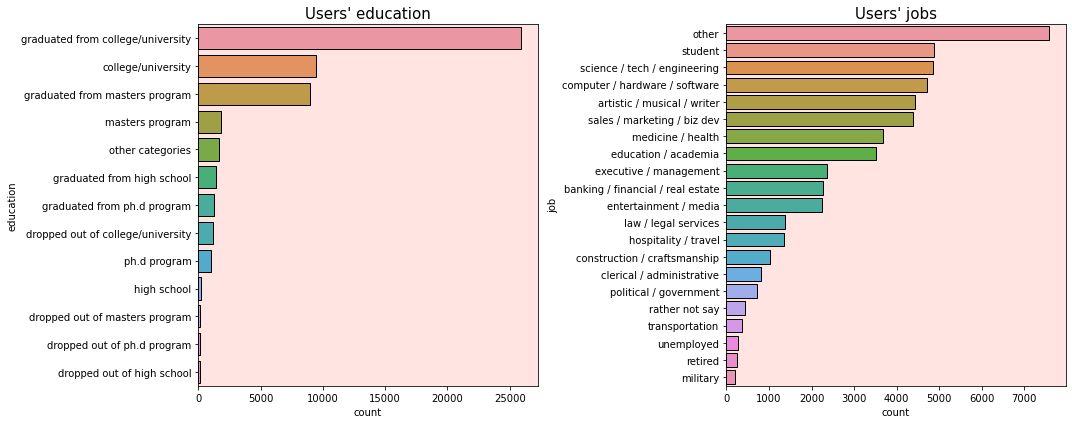

In [20]:
sns.set_palette ('Spectral')

fig = plt.figure(figsize = (15,6))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.countplot(data=df2, y="education", edgecolor = 'black',
                    order=df2['education'].value_counts().sort_values(ascending = False).index)
ax1.set_title("Users' education", fontsize = 15)
ax1.set_facecolor('mistyrose')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.countplot(data=df2, y="job", edgecolor = 'black',
                    order=df2['job'].value_counts().sort_values(ascending = False).index)
ax2.set_title("Users' jobs", fontsize = 15)
ax2.set_facecolor('mistyrose')

plt.tight_layout()
plt.show()

In the next charts, the data suggest that most users do not have kids, and most users like dogs and cats.

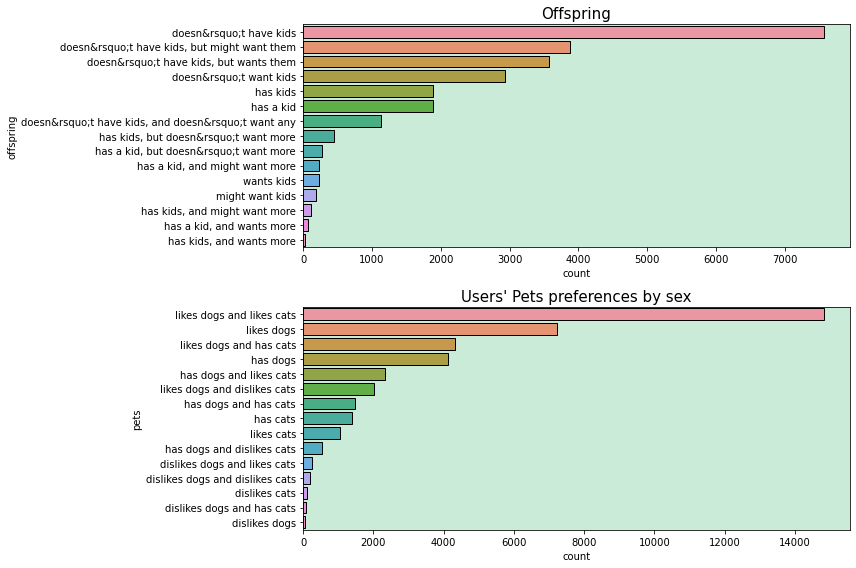

In [21]:
sns.set_palette ('Dark2')

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(2,1,1)
ax1 = sns.countplot(data=df2, y="offspring", edgecolor = 'black',
                    order=df2['offspring'].value_counts().sort_values(ascending = False).index)
ax1.set_title('Offspring', fontsize = 15)
ax1.set_facecolor('#caebd8')

ax2 = fig.add_subplot(2,1,2)
ax2 = sns.countplot(data=df2, y="pets", edgecolor = 'black',
                    order=df2['pets'].value_counts().sort_values(ascending = False).index)
ax2.set_title("Users' Pets preferences by sex", fontsize = 15)
ax2.set_facecolor('#caebd8')

plt.tight_layout()
plt.show()

To end this section, In the users' religion graph we notices that the majority was not very religious identifying as agnostic, other, or atheists. Looking at users signs, there are mainly evenly distributed. However, Capricorns users are the rarest in the dataset and Leo users are the most common.

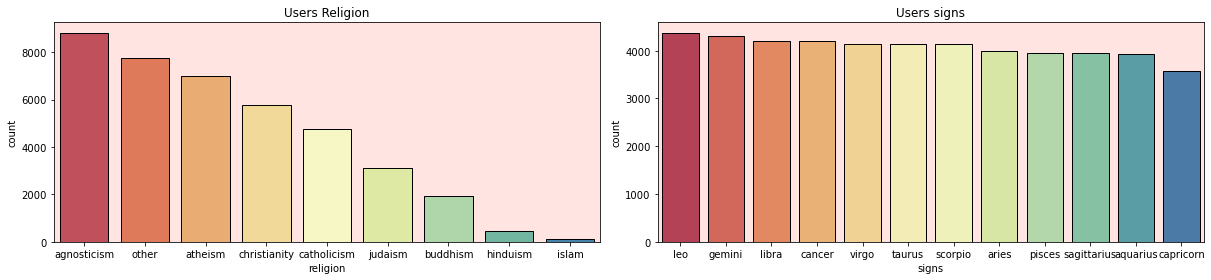

In [22]:
fig = plt.figure(figsize = (17,4))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.countplot(data=df2, x="religion", palette = ('Spectral'), edgecolor = 'black',
                   order=df2['religion'].value_counts().sort_values(ascending = False).index)
ax1.set_title('Users Religion')
ax1.set_facecolor('mistyrose')

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.countplot(data=df2, x="signs", palette = ('Spectral'), edgecolor = 'black',
                   order=df2['signs'].value_counts().sort_values(ascending = False).index)
ax2.set_title('Users signs')
ax2.set_facecolor('mistyrose')

plt.tight_layout()
plt.show()

### 4. Data Preperation

In this section, and according with the exploratory analysis realized, I will deal with missing data and categorical features. In this way, as first step, I am going to select the features that I consider necessary to predict the zodiac sign of the people.

In [23]:
df2.columns

Index(['drinks', 'drugs', 'income', 'job', 'offspring', 'orientation', 'pets',
       'sex', 'smokes', 'status', 'diet', 'education', 'religion', 'signs'],
      dtype='object')

In [24]:
df3 = df2[['sex','status','orientation','drinks','drugs','smokes','signs']]

In [25]:
df3.head()

,sex,status,orientation,drinks,drugs,smokes,signs
0,m,single,straight,socially,never,sometimes,gemini
1,m,single,straight,often,sometimes,no,cancer
2,m,available,straight,socially,NaN,no,pisces
3,m,single,straight,socially,NaN,no,pisces
4,m,single,straight,socially,never,no,aquarius


#### Missing Data
Missing data is often not handled by machine learning algorithms well and must be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values.

Looking at the quantity `Nan` values in some columns (as drugs or signs) I will add a new category that can include those values as a new category called "Not specified". In the other columns, I will delete the `Nan` values to create a clean and complete dataset.

In [26]:
print(df3.shape)
df3.isnull().sum()

(59946, 7)


sex                0
status             0
orientation        0
drinks          2985
drugs          14080
smokes          5512
signs          11056
dtype: int64

In [27]:
df3['drugs'] = df3.drugs.replace(np.nan, "Not specified")
df3['signs'] = df3.signs.replace(np.nan, "Not specified")

In [28]:
df3.isnull().sum()

sex               0
status            0
orientation       0
drinks         2985
drugs             0
smokes         5512
signs             0
dtype: int64

In [29]:
df4 = df3.dropna()
df4.isnull().sum()

sex            0
status         0
orientation    0
drinks         0
drugs          0
smokes         0
signs          0
dtype: int64

#### Categorical features - Dummies variables
In this next step, dummies variables are created to deal with the categorical variables. Dummies variables will turn the categories per variable into its own binary identifier. This process is also called *encoding*. 

Before to apply the transformation of the categorical data, I will split the dataset in 2 different: 
- Validation Dataset: This dataset will contain all the rows with *Not specified* signs. 
- Training and Testing Dataset: This dataset will contain the rest of the data. 

The reason behind this decision is that I will fit the next models with the training and testing dataset and then, I will use the validation dataset with the unknown zodiac signs to predict them.

After that, I will define the predictor variables and the target or labels. Finally, I will proceed with the encoding process.

In [30]:
# Validation dataset
mask1 = df4.signs == "Not specified"

validation_set = df4[mask1]
validation_set.shape

(8744, 7)

In [31]:
# Training / Testing Dataset
mask2 = df4.signs != "Not specified"

train_test_set = df4[mask2]
train_test_set.shape

(44658, 7)

In [32]:
# Targets and Predictor variables.
X = train_test_set.drop(['signs'], axis = 1)
y = train_test_set['signs']

In [33]:
# Creating the dummies variables.
X = pd.get_dummies(X, drop_first = True)
print(X.shape)
X.head()

(44658, 19)


,sex_m,status_married,status_seeing someone,status_single,status_unknown,orientation_gay,orientation_straight,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


### 5. Machine Learning Models. 
To try find the best way to predict the zodiac sign of the people in the dataset, I will proceed to train two classification models: 
1. KNeighborsClassifier
2. DecisionTreeClassifier Model.  

After that, will evaluate their performances using the confusion matrix  and the classification report.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35726, 19) (8932, 19) (35726,) (8932,)


#### 1. KNN Model:
Using the default hyperparameters values, this model had a 10% accuracy in the training dataset and 8% accuracy in the testing dataset. These values are not a good sign what means that the model does not capture any logic.

In [35]:
# Model
knn_classifier = KNeighborsClassifier (n_neighbors = 5, n_jobs = -1)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [36]:
# Predictions
knn_pred_train = knn_classifier.predict(X_train)
knn_pred_test = knn_classifier.predict(X_test)

In [37]:
print('Train Prediction Report')
print(classification_report(y_train, knn_pred_train))

Train Prediction Report
              precision    recall  f1-score   support

    aquarius       0.10      0.16      0.12      2886
       aries       0.08      0.35      0.14      2908
      cancer       0.09      0.32      0.14      3099
   capricorn       0.15      0.04      0.06      2612
      gemini       0.10      0.10      0.10      3180
         leo       0.18      0.03      0.05      3216
       libra       0.16      0.02      0.04      3082
      pisces       0.10      0.05      0.07      2867
 sagittarius       0.14      0.03      0.05      2843
     scorpio       0.18      0.03      0.04      3013
      taurus       0.24      0.02      0.04      2989
       virgo       0.17      0.03      0.05      3031

    accuracy                           0.10     35726
   macro avg       0.14      0.10      0.08     35726
weighted avg       0.14      0.10      0.08     35726



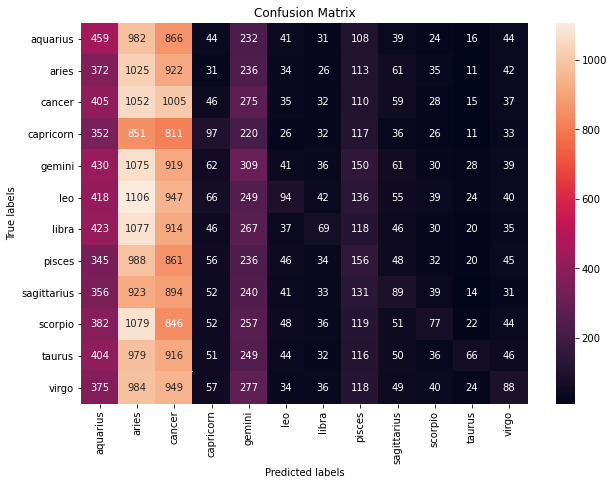

In [38]:
# Confusion Matrix -  Train set.
cart_cm = confusion_matrix(y_train, knn_pred_train)
cart_labels = knn_classifier.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

In [39]:
print('Test Prediction Report')
print(classification_report(y_test, knn_pred_test))

Test Prediction Report
              precision    recall  f1-score   support

    aquarius       0.08      0.14      0.11       709
       aries       0.08      0.35      0.14       741
      cancer       0.08      0.30      0.13       739
   capricorn       0.06      0.02      0.03       677
      gemini       0.08      0.08      0.08       741
         leo       0.09      0.01      0.02       793
       libra       0.11      0.02      0.03       758
      pisces       0.08      0.04      0.06       709
 sagittarius       0.06      0.01      0.02       738
     scorpio       0.07      0.01      0.02       755
      taurus       0.07      0.01      0.01       802
       virgo       0.09      0.01      0.02       770

    accuracy                           0.08      8932
   macro avg       0.08      0.08      0.06      8932
weighted avg       0.08      0.08      0.05      8932



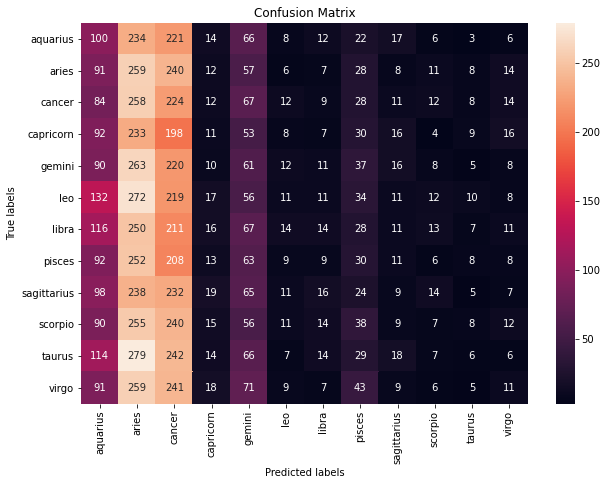

In [40]:
# Confusion Matrix -  Test set.
cart_cm = confusion_matrix(y_test, knn_pred_test)
cart_labels = knn_classifier.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

#### 2.  Decision Tree Model:
The default max_depth is None which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples". 

Going back to the model, a quick analysis will show that this tree model has a depth of 18 branches. In this model, the accuracy is not so different from the accuracy of knn model. However, it is higher. 



In [41]:
# Model
tree_classifier = DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Predictions
tree_pred_train = tree_classifier.predict(X_train)
tree_pred_test = tree_classifier.predict(X_test)

In [43]:
# Depth 
tree_classifier.get_depth()

18

In [44]:
print('Train Prediction Report')
print(classification_report(y_train, tree_pred_train))

Train Prediction Report
              precision    recall  f1-score   support

    aquarius       0.19      0.09      0.12      2886
       aries       0.14      0.12      0.13      2908
      cancer       0.14      0.18      0.16      3099
   capricorn       0.25      0.06      0.09      2612
      gemini       0.20      0.08      0.12      3180
         leo       0.11      0.33      0.16      3216
       libra       0.11      0.32      0.16      3082
      pisces       0.26      0.03      0.06      2867
 sagittarius       0.16      0.06      0.09      2843
     scorpio       0.14      0.09      0.11      3013
      taurus       0.19      0.07      0.10      2989
       virgo       0.13      0.10      0.11      3031

    accuracy                           0.13     35726
   macro avg       0.17      0.13      0.12     35726
weighted avg       0.17      0.13      0.12     35726



In [45]:
print('Test Prediction Report')
print(classification_report(y_test, tree_pred_test))

Test Prediction Report
              precision    recall  f1-score   support

    aquarius       0.08      0.04      0.05       709
       aries       0.07      0.06      0.07       741
      cancer       0.08      0.11      0.09       739
   capricorn       0.06      0.01      0.02       677
      gemini       0.09      0.04      0.06       741
         leo       0.09      0.27      0.13       793
       libra       0.09      0.27      0.14       758
      pisces       0.09      0.01      0.02       709
 sagittarius       0.06      0.02      0.03       738
     scorpio       0.09      0.05      0.07       755
      taurus       0.08      0.03      0.05       802
       virgo       0.08      0.06      0.07       770

    accuracy                           0.08      8932
   macro avg       0.08      0.08      0.07      8932
weighted avg       0.08      0.08      0.07      8932



#### Cross Validation
Looking forward to seeing if these results are a consequence of the random sample choice, I will apply Cross Validation over the trained models. After that, I will choose between them and optimize the model who obtain the best accuracy score.

In [46]:
# Cross Validation - KNN Model
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
results = cross_val_score(knn_classifier, X_train, y_train, cv = kfold, scoring = 'accuracy')

print(results)
print("KNN Model - Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08284355 0.07893632 0.08229531 0.0829951  0.08145556]
KNN Model - Baseline: 8.17% (0.15%)


In [47]:
# Cross Validation - Tree Model
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
results = cross_val_score(tree_classifier, X_train, y_train, cv = kfold, scoring = 'accuracy')

print(results)
print("Decision Tree Model - Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08536244 0.07991603 0.08327502 0.08747376 0.08369489]
Decision Tree Model - Baseline: 8.39% (0.25%)


Looking at this results, the decision tree model will be made it again, but using GridSearch to optimize its hyperparameters. 

In [48]:
tree_class = DecisionTreeClassifier(random_state = 42)

param_grid = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
              'max_depth' : [5, 7, 10, 12, 15, None],
              'min_samples_split' : [2, 3, 5, 10, 15]}

In [49]:
model = GridSearchCV(tree_class, param_grid = param_grid, cv = 5)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 12, 15, None],
                         'min_samples_split': [2, 3, 5, 10, 15],
                         'splitter': ['best', 'random']})

In [50]:
print("Mejores parametros: "+ str(model.best_params_))
print("Mejor Score: "+ str(model.best_score_)+'\n')
scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'splitter': 'best'}
Mejor Score: 0.08794715517614518



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083361,0.004482,0.012189,0.002484,gini,5,2,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1
1,0.074327,0.006707,0.013557,0.004644,gini,5,2,random,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084815,0.092652,0.084955,0.089293,0.087919,0.002923,9
2,0.081628,0.003954,0.010169,0.000570,gini,5,3,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1
3,0.074465,0.005496,0.011105,0.001063,gini,5,3,random,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084815,0.092652,0.084955,0.089293,0.087919,0.002923,9
4,0.081963,0.003550,0.009183,0.001507,gini,5,5,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.091227,0.008187,0.013117,0.004551,entropy,None,5,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.081024,0.083975,0.090133,0.080476,0.080476,0.083217,0.003694,101
116,0.097781,0.003826,0.012650,0.002245,entropy,None,10,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.081584,0.083975,0.090833,0.080896,0.080336,0.083525,0.003859,77
117,0.112551,0.014550,0.014296,0.002412,entropy,None,10,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.081444,0.083975,0.089993,0.080756,0.080616,0.083357,0.003532,89
118,0.104697,0.004702,0.012437,0.001770,entropy,None,15,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.081724,0.084115,0.090973,0.080756,0.080336,0.083581,0.003921,76


In [51]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083361,0.004482,0.012189,0.002484,gini,5,2,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1
1,0.074327,0.006707,0.013557,0.004644,gini,5,2,random,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084815,0.092652,0.084955,0.089293,0.087919,0.002923,9
2,0.081628,0.003954,0.010169,0.000570,gini,5,3,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1
3,0.074465,0.005496,0.011105,0.001063,gini,5,3,random,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084815,0.092652,0.084955,0.089293,0.087919,0.002923,9
4,0.081963,0.003550,0.009183,0.001507,gini,5,5,best,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.087881,0.084955,0.092652,0.084955,0.089293,0.087947,0.002894,1


### Conclusion
#### General Comments
In this project machine learning was used to try to predict the zodiac signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. However, the trained models could not capture the logic inside the chosen data. So, I can conclude that those models are underfitted and they are not good for predictions. 

Since the results obtained with the trained models are not the best, I have decided not to continue with the prediction of the zodiac signs of the users that are included in the validation set.


#### Next Steps
Next steps will be to seriously consider whether it is possible to predict user's astrological signs, or if there is a way to do it aggregating more data. Another possibility is to add additional models to see if any more predictive power could be squeezed out of the algorithms.